In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [85]:
from nltk import sent_tokenize
import nltk
nltk.download('punkt')
trip_advisor = '한림공원, 비자림, 제주 돌문화 공원, 제주 절물 자연 휴양림, 제주 4.3 평화공원, 한라 수목원, 우도등대공원, 사라봉공원, 함덕 서우봉 해변, 협재 해수욕장, 월정리 해변, 세화 해수욕장, 이호테우 해변, 금능해수욕장, 김녕 성세기 해변, 곽지 해수욕장, 에코랜드 테마파크, 제주 유리의 성, 테지움 제주, 더 마 파크, 제주 공룡 랜드, 제주미니미니랜드, 파크 써던랜드, 스누피 가든, 한림공원, 제주김녕미로공원, 메이즈랜드, 다희연, 김경숙해바라기농장, 제주불빛정원, 카페 글렌코, 토끼섬, 수월봉, 제주김녕미로공원, 신비의 도로, 용두암, 신창 풍차해안도로, 항파두리 항몽, 제주불빛정원, 수월봉, 한담해안산책로, 신창 풍차해안도로, 검멀레, 서우봉, 관음사탐방로, 왕따나무, 민오름 - 오라동, 녹산로유채꽃길, 우도, 만장굴, 함덕 서우봉 해변, 동문 재래시장, 협재 해수욕장, 한림공원, 에코랜드 테마파크, 비자림, 산굼부리 분화구, 한라산 성판악. 해녀 박물관, 성읍 민속마을 '
hotels = '한라산, 성산일출봉, 섭지코지, 만장굴, 우도, 추자도, 국립제주박물관, 성읍민속마을, 휴애리 자연생활공원, 제주 올레'
jeju_iljung = '섭지코지, 용두암&용연, 오설록티뮤지엄, 사계해안, 하귀↔애월 해안도로, 쇠소깍 , 한담해안산책로 , 월정리해변 , 제주시 동문재래시장 , 신비의도로(경유) , 협재해수욕장(산책) , 외돌개 , 새연교 , 1100고지습지 , 서귀포매일올레시장'
trip = '우도, 한라산 국립공원, 제주난타전용관, 용두암, 에코랜드, BAOJIAN STREET, 산굼부리, 월정리 갈비밥, 함덕해수욕장, 제주 러브랜드, 올레길, 애월한담산책로, 협재해변, 칠성로 쇼핑거리, 제주특별자치도 민속자연사박물관, 한라수목원, 흑돼지거리, 만장굴, 브릭캠퍼스 제주, 신비의도로'

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [113]:
import re
import pandas as pd

class Seq1:
    def __init__(self, input_string):
        self.input_string = input_string
        self.tokens = None  # 토큰 리스트를 저장할 변수 초기화

    def remove_spaces(self):
        self.input_string = self.input_string.replace(' ', '')

    def remove_commas(self):
        self.input_string = self.input_string.replace(',', ' ')

    def tokenize_words(self):
        self.tokens = nltk.word_tokenize(self.input_string)  # 토큰 리스트 저장
        self.input_string = ' '.join(self.tokens)

    def process_string(self):
        self.remove_spaces()
        self.remove_commas()
        self.tokenize_words()
        return self

trip_adv_tokens = Seq1(trip_advisor).process_string().tokens
hotels_tokens = Seq1(hotels).process_string().tokens
iljung_tokens = Seq1(jeju_iljung).process_string().tokens
trip_tokens = Seq1(trip).process_string().tokens
print(iljung_tokens)

['섭지코지', '용두암', '&', '용연', '오설록티뮤지엄', '사계해안', '하귀↔애월해안도로', '쇠소깍', '한담해안산책로', '월정리해변', '제주시동문재래시장', '신비의도로', '(', '경유', ')', '협재해수욕장', '(', '산책', ')', '외돌개', '새연교', '1100고지습지', '서귀포매일올레시장']


In [117]:
from nltk import word_tokenize
words = trip_adv_tokens+hotels_tokens+iljung_tokens+trip_tokens
words = [word for word in words if word not in ['(', ')', '&']]
print(words)


['한림공원', '비자림', '제주돌문화공원', '제주절물자연휴양림', '제주4.3평화공원', '한라수목원', '우도등대공원', '사라봉공원', '함덕서우봉해변', '협재해수욕장', '월정리해변', '세화해수욕장', '이호테우해변', '금능해수욕장', '김녕성세기해변', '곽지해수욕장', '에코랜드테마파크', '제주유리의성', '테지움제주', '더마파크', '제주공룡랜드', '제주미니미니랜드', '파크써던랜드', '스누피가든', '한림공원', '제주김녕미로공원', '메이즈랜드', '다희연', '김경숙해바라기농장', '제주불빛정원', '카페글렌코', '토끼섬', '수월봉', '제주김녕미로공원', '신비의도로', '용두암', '신창풍차해안도로', '항파두리항몽', '제주불빛정원', '수월봉', '한담해안산책로', '신창풍차해안도로', '검멀레', '서우봉', '관음사탐방로', '왕따나무', '민오름-오라동', '녹산로유채꽃길', '우도', '만장굴', '함덕서우봉해변', '동문재래시장', '협재해수욕장', '한림공원', '에코랜드테마파크', '비자림', '산굼부리분화구', '한라산성판악.해녀박물관', '성읍민속마을', '한라산', '성산일출봉', '섭지코지', '만장굴', '우도', '추자도', '국립제주박물관', '성읍민속마을', '휴애리자연생활공원', '제주올레', '섭지코지', '용두암', '용연', '오설록티뮤지엄', '사계해안', '하귀↔애월해안도로', '쇠소깍', '한담해안산책로', '월정리해변', '제주시동문재래시장', '신비의도로', '경유', '협재해수욕장', '산책', '외돌개', '새연교', '1100고지습지', '서귀포매일올레시장', '우도', '한라산국립공원', '제주난타전용관', '용두암', '에코랜드', 'BAOJIANSTREET', '산굼부리', '월정리갈비밥', '함덕해수욕장', '제주러브랜드', '올레길', '애월한담산책로', '협재해변', '칠성로쇼핑거리', '제주특별자치도민속자연사박물관', '한라수목원', '흑돼지거리', '만장

In [88]:
!pip install konlpy
from konlpy.tag import Kkma
from konlpy.utils import pprint

In [89]:
import numpy as np
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt


In [118]:
counts = Counter(words)
tags = counts.most_common(60)

FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
print(tags)

[('한림공원', 3), ('협재해수욕장', 3), ('신비의도로', 3), ('용두암', 3), ('우도', 3), ('만장굴', 3), ('비자림', 2), ('한라수목원', 2), ('함덕서우봉해변', 2), ('월정리해변', 2), ('에코랜드테마파크', 2), ('제주김녕미로공원', 2), ('제주불빛정원', 2), ('수월봉', 2), ('신창풍차해안도로', 2), ('한담해안산책로', 2), ('성읍민속마을', 2), ('섭지코지', 2), ('제주돌문화공원', 1), ('제주절물자연휴양림', 1), ('제주4.3평화공원', 1), ('우도등대공원', 1), ('사라봉공원', 1), ('세화해수욕장', 1), ('이호테우해변', 1), ('금능해수욕장', 1), ('김녕성세기해변', 1), ('곽지해수욕장', 1), ('제주유리의성', 1), ('테지움제주', 1), ('더마파크', 1), ('제주공룡랜드', 1), ('제주미니미니랜드', 1), ('파크써던랜드', 1), ('스누피가든', 1), ('메이즈랜드', 1), ('다희연', 1), ('김경숙해바라기농장', 1), ('카페글렌코', 1), ('토끼섬', 1), ('항파두리항몽', 1), ('검멀레', 1), ('서우봉', 1), ('관음사탐방로', 1), ('왕따나무', 1), ('민오름-오라동', 1), ('녹산로유채꽃길', 1), ('동문재래시장', 1), ('산굼부리분화구', 1), ('한라산성판악.해녀박물관', 1), ('한라산', 1), ('성산일출봉', 1), ('추자도', 1), ('국립제주박물관', 1), ('휴애리자연생활공원', 1), ('제주올레', 1), ('용연', 1), ('오설록티뮤지엄', 1), ('사계해안', 1), ('하귀↔애월해안도로', 1)]


In [119]:
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()
[f for f in sys_font if 'Nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf']

## 워드 클라우드 마스크 결정

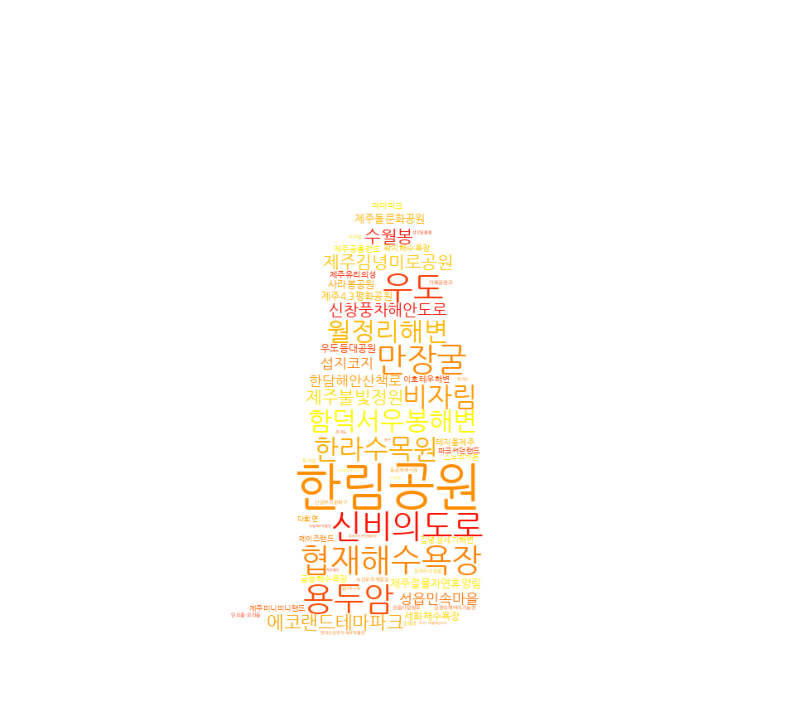

In [120]:
im = Image.open('halbang.png') # 이미지 파일 읽어오기
mask_arr = np.array(im) # 픽셀 값 배열 형태 변환


wc = WordCloud(font_path=FONT_PATH,background_color="white",
               max_font_size=60,
               width=936, height=842,
               mask=mask_arr,
               prefer_horizontal=True,
               colormap='autumn')
cloud = wc.generate_from_frequencies(dict(tags))

plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(cloud)
plt.show()

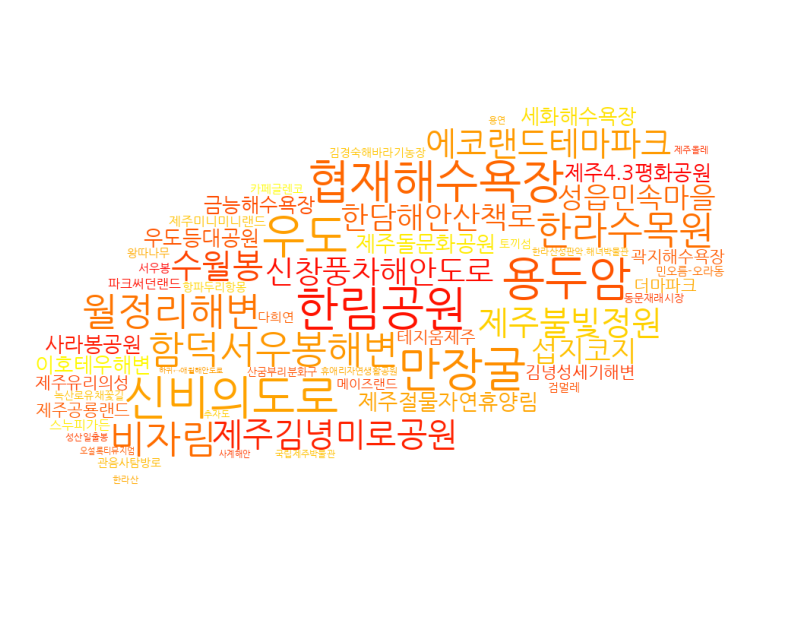

In [121]:
im = Image.open('jeju.png') # 이미지 파일 읽어오기
mask_arr = np.array(im) # 픽셀 값 배열 형태 변환

wc = WordCloud(font_path=FONT_PATH,background_color="white",
               max_font_size=60,
               width=1010, height=800,
               mask=mask_arr,
               prefer_horizontal=True,
               colormap='autumn')
cloud = wc.generate_from_frequencies(dict(tags))

plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(cloud)
plt.show()